# Random Basis Functions
### Loss = Mean Squared Error
### No utilizzo di Libreria

In [1]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
#import deepxde

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


#### Validation loss rispetto diversi valori di M

In [2]:
from keras.models import Sequential
from keras.layers import Dense

pi = np.pi
history = {}
mm = [100, 200, 400, 600]
rr = [0.5, 1, 2, 5 , 10]
for M in mm:
#M = 100
    Rm = 2
    d=1

    weight = np.zeros((M,d))
    biases = np.zeros((M,1))

    for i in range(M):
        for j in range(d):
            weight[i][j]= np.random.uniform(low=-Rm, high=Rm)
        biases[i] = np.random.uniform(low=-0.0005, high=0.0005)

    def phi(x):
        bias = np.repeat(biases, np.shape(x)[1], axis = -1)
        out = np.sin(weight@x + bias)
        return out

    train = np.array([np.linspace(-1, 1, 20)])
    test = np.array([np.linspace(-1, 1, 7)])

    def func(x):
        return np.sin(np.pi * x)
        #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2
        
    y_train = func(train).T

    y_test = func(test).T

    k_init = tf.keras.initializers.RandomUniform(minval=-Rm, maxval=Rm)
    b_init = tf.keras.initializers.RandomUniform(minval=-0.0005, maxval=0.0005)
    def custom_activation(x):
        return tf.sin(x)

    model = Sequential()
    #layer1 = Dense(M, activation=custom_activation)

    model.add(Dense(M, activation=custom_activation, input_dim=d, kernel_initializer=k_init,bias_initializer=b_init, trainable=False))
    model.add(Dense(1))
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', 
                    metrics=[tf.keras.losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error"),'accuracy'])

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
    history[M] = model.fit(train.T, y_train, validation_data = (test.T,y_test), epochs=5000, batch_size=64, callbacks=[callback])

Epoch 1/5000
1/1 [==============================] - 0s 455ms/step - loss: 0.0601 - mean_absolute_error: 0.2248 - accuracy: 0.0500 - val_loss: 0.0432 - val_mean_absolute_error: 0.1848 - val_accuracy: 0.1429
Epoch 2/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0469 - mean_absolute_error: 0.1986 - accuracy: 0.0500 - val_loss: 0.0324 - val_mean_absolute_error: 0.1590 - val_accuracy: 0.1429
Epoch 3/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0356 - mean_absolute_error: 0.1726 - accuracy: 0.0500 - val_loss: 0.0236 - val_mean_absolute_error: 0.1336 - val_accuracy: 0.1429
Epoch 4/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0262 - mean_absolute_error: 0.1468 - accuracy: 0.0500 - val_loss: 0.0168 - val_mean_absolute_error: 0.1086 - val_accuracy: 0.1429
Epoch 5/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0187 - mean_absolute_error: 0.1215 - accuracy: 0.0500 - val_loss: 0.0119 - val_mean_absolute_error: 0.09

In [9]:
for M in mm:
    bc     = history[M].history['mean_absolute_error']
    bc_val     = history[M].history['val_mean_absolute_error']

    #plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2, label='training || M = ' + str(M))
    plt.loglog(range(np.shape(bc_val)[0]),bc_val, linewidth=2, label='validation || M = ' + str(M))
plt.legend()
plt.show()

KeyError: 100

#### Validation loss rispetto diversi valori di Rm

In [4]:
from keras.models import Sequential
from keras.layers import Dense

pi = np.pi
history = {}
mm = [100, 200, 400, 600]
rr = [0.5, 1, 2, 5 , 10]
for Rm in rr:
    M = 200
    #Rm = 2
    d=1

    weight = np.zeros((M,d))
    biases = np.zeros((M,1))

    for i in range(M):
        for j in range(d):
            weight[i][j]= np.random.uniform(low=-Rm, high=Rm)
        biases[i] = np.random.uniform(low=-0.0005, high=0.0005)

    def phi(x):
        bias = np.repeat(biases, np.shape(x)[1], axis = -1)
        out = np.sin(weight@x + bias)
        return out

    train = np.array([np.linspace(-1, 1, 20)])
    test = np.array([np.linspace(-1, 1, 7)])

    def func(x):
        return np.sin(np.pi * x)
        #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2
        
    y_train = func(train).T

    y_test = func(test).T

    k_init = tf.keras.initializers.RandomUniform(minval=-Rm, maxval=Rm)
    b_init = tf.keras.initializers.RandomUniform(minval=-0.0005, maxval=0.0005)
    def custom_activation(x):
        return tf.sin(x)

    model = Sequential()
    #layer1 = Dense(M, activation=custom_activation)

    model.add(Dense(M, activation=custom_activation, input_dim=d, kernel_initializer=k_init,bias_initializer=b_init, trainable=False))
    model.add(Dense(1))
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', 
                    metrics=[tf.keras.losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error"),'accuracy'])

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
    history[Rm] = model.fit(train.T, y_train, validation_data = (test.T,y_test), epochs=3000, batch_size=64, callbacks=[callback])

Epoch 1/3000
1/1 [==============================] - 0s 445ms/step - loss: 0.3363 - mean_absolute_error: 0.5196 - accuracy: 0.0500 - val_loss: 0.3142 - val_mean_absolute_error: 0.4905 - val_accuracy: 0.1429
Epoch 2/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.3182 - mean_absolute_error: 0.5058 - accuracy: 0.0500 - val_loss: 0.2964 - val_mean_absolute_error: 0.4769 - val_accuracy: 0.1429
Epoch 3/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.3006 - mean_absolute_error: 0.4920 - accuracy: 0.0500 - val_loss: 0.2791 - val_mean_absolute_error: 0.4633 - val_accuracy: 0.1429
Epoch 4/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.2835 - mean_absolute_error: 0.4782 - accuracy: 0.0500 - val_loss: 0.2623 - val_mean_absolute_error: 0.4497 - val_accuracy: 0.1429
Epoch 5/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2670 - mean_absolute_error: 0.4644 - accuracy: 0.0500 - val_loss: 0.2462 - val_mean_absolute_error: 0.43

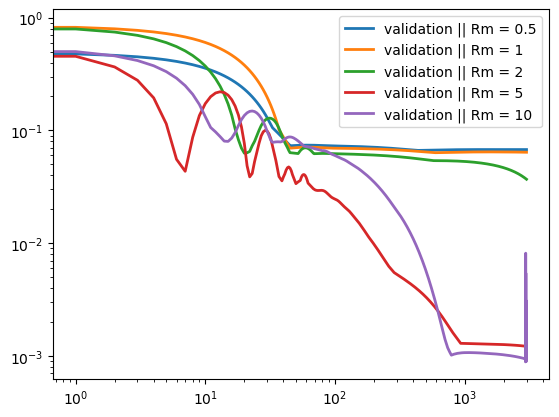

In [7]:
for Rm in rr:
    bc     = history[Rm].history['mean_absolute_error']
    bc_val     = history[Rm].history['val_mean_absolute_error']

    #plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2, label='training || Rm = ' + str(Rm))
    plt.loglog(range(np.shape(bc_val)[0]),bc_val, linewidth=2, label='validation || Rm = ' + str(Rm))
plt.legend()
plt.show()

In [15]:
M = 200
Rm = 2
d=1

weight = np.zeros((M,d))
biases = np.zeros((M,1))

for i in range(M):
    for j in range(d):
        weight[i][j]= np.random.uniform(low=-Rm, high=Rm)
    biases[i] = np.random.uniform(low=-0.0005, high=0.0005)

def phi(x):
    bias = np.repeat(biases, np.shape(x)[1], axis = -1)
    out = np.sin(weight@x + bias)
    return out

train = np.array([np.linspace(-1, 1, 20)])
test = np.array([np.linspace(-1, 1, 7)])

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2
    
y_train = func(train).T

y_test = func(test).T

k_init = tf.keras.initializers.RandomUniform(minval=-Rm, maxval=Rm)
b_init = tf.keras.initializers.RandomUniform(minval=-0.0005, maxval=0.0005)
def custom_activation(x):
    return tf.sin(x)

model = Sequential()
#layer1 = Dense(M, activation=custom_activation)

model.add(Dense(M, activation=custom_activation, input_dim=d, kernel_initializer=k_init,bias_initializer=b_init, trainable=False))
model.add(Dense(1))
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', 
                metrics=[tf.keras.losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error"),'accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
history = model.fit(train.T, y_train, validation_data = (test.T,y_test), epochs=3000, batch_size=64, callbacks=[callback])

Epoch 1/3000
1/1 [==============================] - 0s 378ms/step - loss: 0.3272 - mean_absolute_error: 0.5056 - accuracy: 0.0000e+00 - val_loss: 0.2616 - val_mean_absolute_error: 0.4562 - val_accuracy: 0.1429
Epoch 2/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.2607 - mean_absolute_error: 0.4480 - accuracy: 0.0000e+00 - val_loss: 0.2369 - val_mean_absolute_error: 0.4457 - val_accuracy: 0.1429
Epoch 3/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.2138 - mean_absolute_error: 0.4165 - accuracy: 0.0000e+00 - val_loss: 0.2322 - val_mean_absolute_error: 0.4356 - val_accuracy: 0.1429
Epoch 4/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.1860 - mean_absolute_error: 0.3863 - accuracy: 0.0000e+00 - val_loss: 0.2445 - val_mean_absolute_error: 0.4263 - val_accuracy: 0.1429
Epoch 5/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.1751 - mean_absolute_error: 0.3706 - accuracy: 0.0000e+00 - val_loss: 0.2677 - val_mean_

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 200)               400       
                                                                 
 dense_23 (Dense)            (None, 1)                 201       
                                                                 
Total params: 601
Trainable params: 201
Non-trainable params: 400
_________________________________________________________________
None


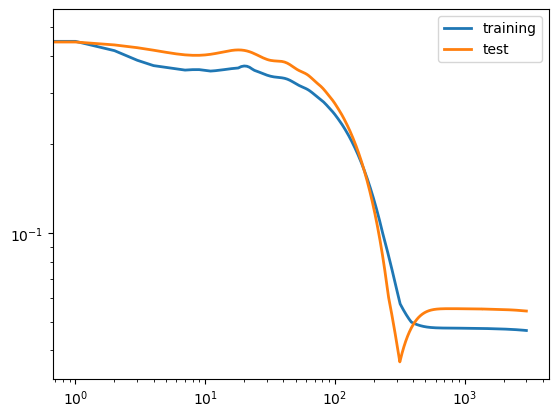

In [16]:
print(model.summary())
bc     = history.history['mean_absolute_error']
bc_val     = history.history['val_mean_absolute_error']

plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2, label='training')
plt.loglog(range(np.shape(bc_val)[0]),bc_val, linewidth=2, label='test')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


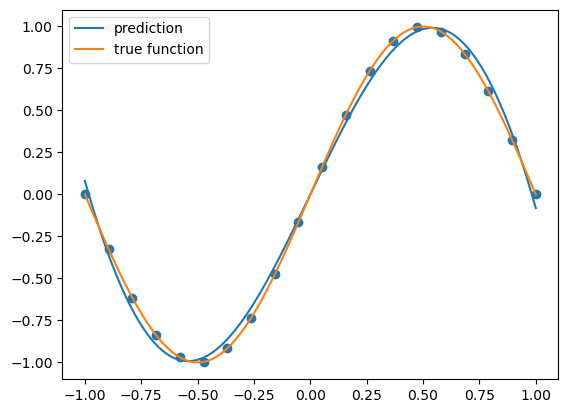

In [17]:
val = np.linspace(-1, 1, 100)

y_pred = model.predict(val)
plt.plot(val, y_pred, label='prediction')
plt.plot(val, func(val), label='true function')
plt.scatter(train, y_train)
plt.legend()

# Deepxde
### Poisson 1D: soluzione = $sin(\pi\,x)$

In [18]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

In [22]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

##### Utilizzo del solo layer delle random feature

In [23]:
M =200
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.FNN_copy(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=10000)

Compiling model...
'compile' took 0.000509 s

Training model...

[2]
[0, 2]
[<tf.Tensor 'sub:0' shape=(20, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub:0' shape=(20, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub:0' shape=(102, 1) dtype=float32>]
Step      Train loss              Test loss               Test metric   
0         [4.33e+01, 3.82e+01]    [4.90e+01, 3.82e+01]    [1.07e+00]    
1000      [4.35e+01, 1.86e-04]    [4.91e+01, 1.86e-04]    [9.97e-01]    
2000      [4.35e+01, 1.86e-04]    [4.91e+01, 1.86e-04]    [9.97e-01]    
3000      [4.34e+01, 1.85e-04]    [4.91e+01, 1.85e-04]    [9.97e-01]    
4000      [4.34e+01, 1.85e-04]    [4.91e+01, 1.85e-04]    [9.96e-01]    
5000      [4.34e+01, 1.85e-04]    [4.90e+01, 1.85e-04]    [9.96e-01]    
6000      [4.33e+01, 1.84e-04]    [4.89e+01, 1.84e-04]    [9.95e-01]    
7000      [4.31e+01, 1.83e-04]    [4.88e+01, 1.83e-04]    [9.93e-01]    
8000      [4.29e+01, 1.81e-04]    [4.86e+01, 1.81e-04]    [9.91e-01]    
9000      [4.26e+01, 

Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


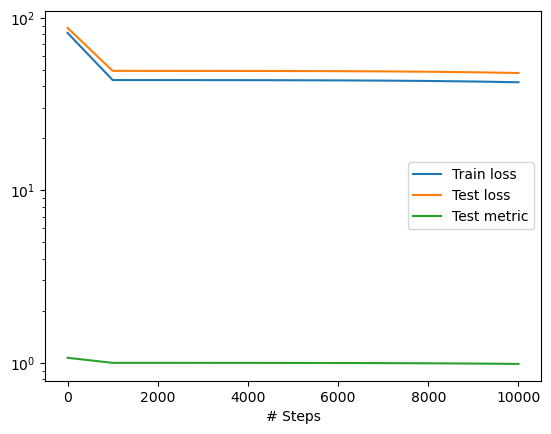

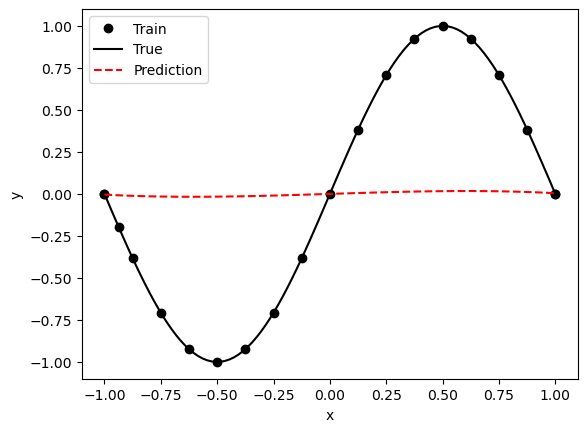

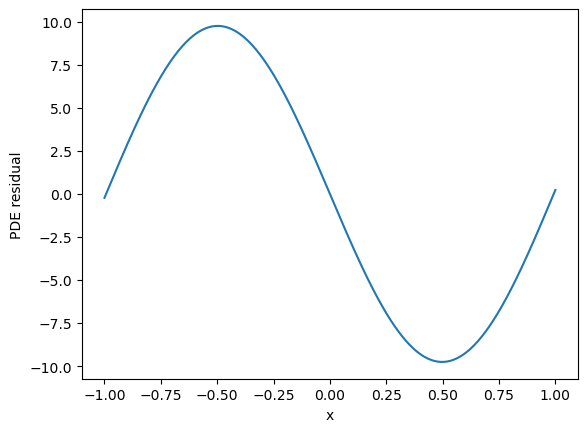

In [24]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()

#### Random feature layer + ''piccolo layer libero''

In [27]:
M =200
layer_size = [1] + [M]  + [5] + [1]

activation = ["sin", 'sin', 'linear']

initializer = "Glorot uniform"

net = dde.nn.FNN_copy(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=10000)

Compiling model...
'compile' took 0.000512 s

Training model...

[2]
[0, 2]
[<tf.Tensor 'sub:0' shape=(20, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub:0' shape=(20, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub:0' shape=(102, 1) dtype=float32>]
Step      Train loss              Test loss               Test metric   
0         [4.35e+01, 3.66e-02]    [4.92e+01, 3.66e-02]    [9.62e-01]    
1000      [1.35e-03, 6.15e-10]    [1.08e-03, 6.15e-10]    [1.11e-03]    
2000      [5.95e-04, 1.19e-08]    [4.86e-04, 1.19e-08]    [7.40e-04]    
3000      [4.75e-04, 6.44e-08]    [3.85e-04, 6.44e-08]    [6.56e-04]    
4000      [4.73e-04, 1.64e-10]    [3.83e-04, 1.64e-10]    [6.68e-04]    
5000      [4.71e-04, 5.64e-09]    [3.81e-04, 5.64e-09]    [6.68e-04]    
6000      [4.68e-04, 9.95e-09]    [3.79e-04, 9.95e-09]    [6.73e-04]    
7000      [4.64e-04, 1.01e-06]    [3.73e-04, 1.01e-06]    [6.17e-04]    
8000      [4.58e-04, 3.82e-09]    [3.71e-04, 3.82e-09]    [6.51e-04]    
9000      [4.64e-04, 

Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


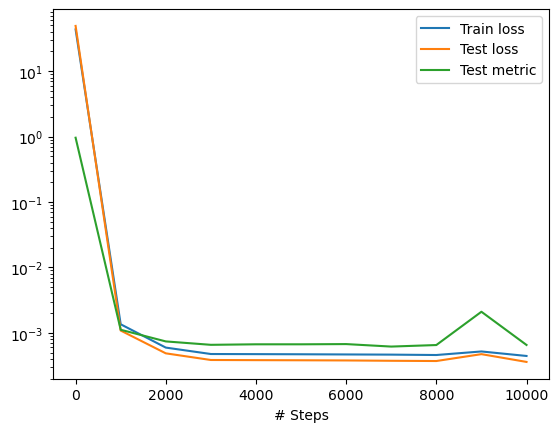

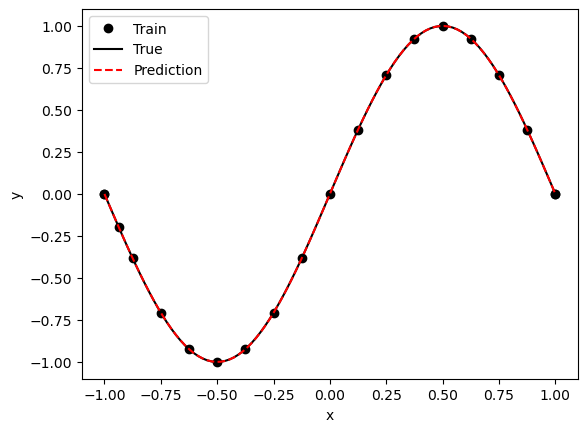

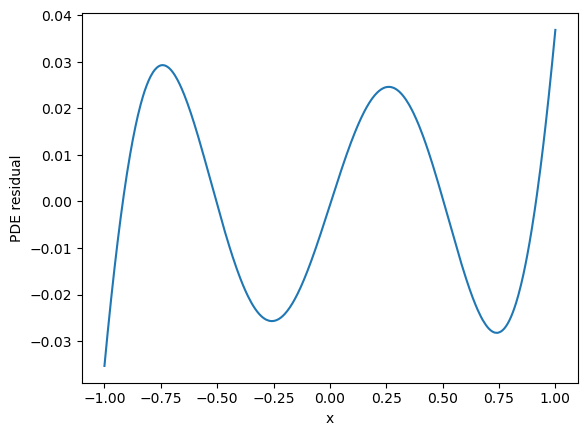

In [28]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()

### Poisson 1D: soluzione = $sin(3\pi\,x + \frac{3\pi}{20}) * cos(2\pi\,x + \frac{\pi}{10}) + 2$

In [39]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    #return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    #return np.sin(np.pi * x)
    return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-0.8, 0)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

In [40]:
M =200
layer_size = [1] + [M]  + [20] + [1]

activation = ["sin", 'sin', 'linear']

initializer = "Glorot uniform"

net = dde.nn.FNN_copy(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=10000)

Compiling model...
'compile' took 0.000434 s

Training model...

[2]
[0, 2]
[<tf.Tensor 'sub_1:0' shape=(20, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub_1:0' shape=(20, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub_1:0' shape=(102, 1) dtype=float32>]
Step      Train loss              Test loss               Test metric   
0         [7.83e+03, 5.06e+01]    [7.59e+03, 5.06e+01]    [1.01e+00]    
1000      [6.80e+03, 3.36e+01]    [7.15e+03, 3.36e+01]    [7.58e-01]    
2000      [6.37e+03, 5.14e+00]    [6.65e+03, 5.14e+00]    [4.34e-01]    
3000      [1.16e+02, 6.02e+00]    [9.64e+01, 6.02e+00]    [4.26e-01]    
4000      [5.91e-01, 7.23e-05]    [5.59e-01, 7.23e-05]    [1.26e-03]    
5000      [5.14e-01, 4.96e-05]    [4.81e-01, 4.96e-05]    [1.36e-03]    
6000      [5.03e-01, 3.17e-04]    [4.28e-01, 3.17e-04]    [2.02e-03]    
7000      [4.26e-01, 5.05e-04]    [3.99e-01, 5.05e-04]    [2.02e-03]    
8000      [2.45e-01, 5.73e-06]    [2.32e-01, 5.73e-06]    [5.38e-04]    
9000      [1.76

Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


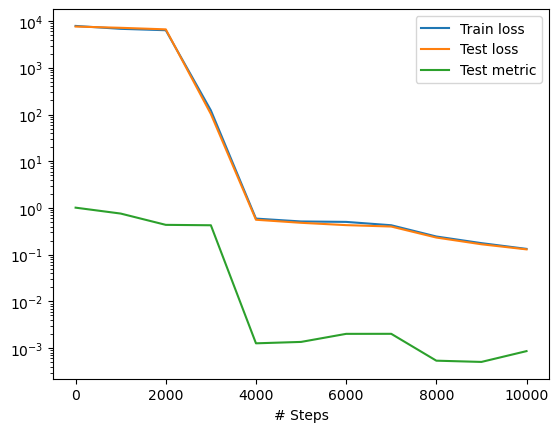

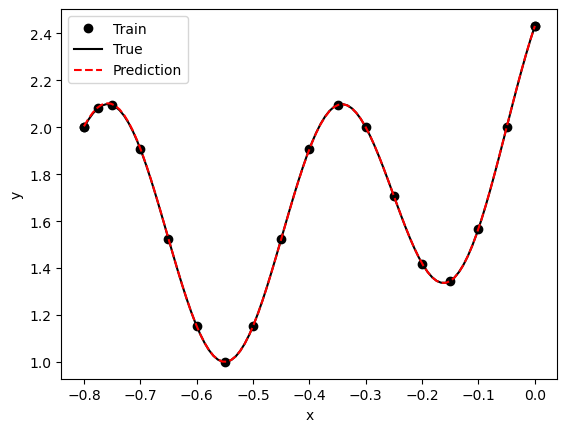

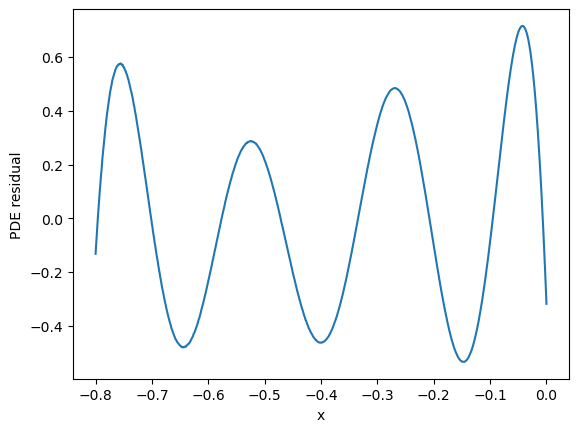

In [41]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()